## 遗传算法求解TSP问题

### 遗传算法

- 遗传算法通过**将待解决问题的答案进行编码**，初始化很多的答案。在这些答案中有好的答案，有坏的答案，他们就代表种群中优秀的个体和比较差的个体。

- 遗传算法就是对这些答案进行评价，保留好的，剔除差的。就像自然界里自然选择的过程。

- 繁衍就是模拟自然界中的物种交叉变异的过程，从而去尝试出更好的答案。

在遗传算法中有几个基本的概念：

1. 用**适应度**去表示个体的优劣，也就是目标函数。
2. 将问题的可行解抽象成基因的过程叫做**编码**。
3. 为了判断改个体的适应度，而将基因重新变成可行解的过程叫做**解码**。

### 旅行商问题

旅行商问题简单来说就是地图上有几座城市，有个旅行商要从某个城市出发，然后经过其它的各个城市各一次，最终回到初始城市。如何规划才能让这趟旅行最短，就是这个问题需要去优化的目标。

### 遗传算法求解旅行商问题

遗传算法有两个关键点：

1. 如何将答案编码成基因。
2. 如何定义个体的适应度。

只要我们知道旅行商此次走过的城市顺序，我们就能求出这次旅行的路程是多少。这样，一趟旅行的编码序列就对应了一个问题的答案了。解码的话就是将旅行路线转换成实际经过的城市，从而依据坐标得到旅行的路程。

对于个体的适应度，我们可以直接将个体的旅行路程作为个体的适应度。路程越短，适应度越强，个体也就越优秀。就越有可能在自然选择中被保留下来。

## 代码实现

导入相关的包

In [1]:
import copy
import random
import argparse
import numpy as np
import matplotlib.pyplot as plt

随机生成城市之间的坐标

提前计算出城市之间的距离，如果有$n$座城市的话，那么生成的城市距离矩阵就是一个$n \times n$的矩阵。

In [2]:
class TspProblem(object):
    def __init__(self, args):
        """
        旅行商问题建模
        """
        self.city_num = args.city_num
        self.pos_dimension = args.pos_dimension
        self.city_pos_list = np.random.rand(self.city_num, self.pos_dimension)  # 城市坐标
        self.city_dist_mat = self.build_dist_mat()  # 城市距离矩阵

    def build_dist_mat(self):
        """
        计算两个城市之间的距离，城市i到城市j的距离，与城市j到城市i的距离相同。
        :return:
        """
        dist_mat = np.zeros([self.city_num, self.city_num])
        for i in range(self.city_num):
            for j in range(i + 1, self.city_num):
                d = self.city_pos_list[i, :] - self.city_pos_list[j, :]
                # 计算点积
                dist_mat[i, j] = np.dot(d, d)
                dist_mat[j, i] = dist_mat[i, j]
        return dist_mat

设置参数

In [3]:
parser = argparse.ArgumentParser(description='Parameter of Genetic Algorithm')
parser.add_argument('--city_num', type=int, default=15, help='city num')  # 城市数量
parser.add_argument('--pos_dimension', type=int, default=2, help='city num')  # 坐标维度
parser.add_argument('--individual_num', type=int, default=60, help='individual num')  # 个体数
parser.add_argument('--gen_num', type=int, default=400, help='generation num')  # 迭代轮数
parser.add_argument('--mutate_prob', type=float, default=0.25, help='probability of mutate')  # 变异概率
arg = parser.parse_args(args=[])

In [4]:
TSP = TspProblem(arg)

查看一下城市的位置坐标信息：

In [5]:
TSP.city_pos_list

array([[0.89203012, 0.11734267],
       [0.55896225, 0.4497456 ],
       [0.356742  , 0.6837889 ],
       [0.95390691, 0.24455854],
       [0.02146835, 0.43498321],
       [0.7587389 , 0.75871704],
       [0.51393439, 0.76835098],
       [0.3583125 , 0.86971252],
       [0.38384727, 0.04818393],
       [0.77175734, 0.4332906 ],
       [0.71113815, 0.91032594],
       [0.75818416, 0.23895036],
       [0.17875443, 0.036562  ],
       [0.15991418, 0.48432212],
       [0.22596975, 0.70365766]])

城市之间的距离矩阵：

In [6]:
TSP.city_dist_mat

array([[0.        , 0.22142591, 0.6073947 , 0.02001261, 0.85877331,
        0.42912762, 0.5667682 , 0.85091488, 0.26303274, 0.11428864,
        0.66154437, 0.03270317, 0.51528772, 0.67066768, 0.78740168],
       [0.22142591, 0.        , 0.0956693 , 0.19808301, 0.28911763,
        0.13537406, 0.1035369 , 0.21663254, 0.19191703, 0.04555252,
        0.23529175, 0.084124  , 0.31527867, 0.16043491, 0.17535534],
       [0.6073947 , 0.0956693 , 0.        , 0.54952924, 0.1743127 ,
        0.16721573, 0.03186019, 0.03457006, 0.40472837, 0.23498712,
        0.17691566, 0.35903712, 0.45058223, 0.07852819, 0.01749615],
       [0.02001261, 0.19808301, 0.54952924, 0.        , 0.90570323,
        0.30244951, 0.46793435, 0.7455502 , 0.36353098, 0.06879826,
        0.5021829 , 0.03833885, 0.64412392, 0.68791104, 0.74066451],
       [0.85877331, 0.28911763, 0.1743127 , 0.90570323, 0.        ,
        0.64837147, 0.35365688, 0.30245356, 0.28093216, 0.56293644,
        0.70159516, 0.58117906, 0.18347837, 

定义个体基类

In [7]:
class Individual(object):
    def __init__(self, args, city_dist_mat, genes=None):
        """
        # 个体类， 构造个体，如果输入的基因为None的话，就随机构造。
        :param genes:
        """
        self.args = args
        self.gene_len = self.args.city_num
        self.genes = genes  # 个体基因
        if self.genes is None:  # 如果个体基因为空的话，就生成一个基因
            self.genes = [i for i in range(self.gene_len)]
            random.shuffle(self.genes)
        self.city_dist_mat = city_dist_mat
        self.fitness = self.evaluate_fitness()  # 个体适应度

    def evaluate_fitness(self):
        """
        适应度就是目标解
        :return:
        """
        fitness = 0.0  # 初始个体适应度为0。
        for i in range(self.gene_len - 1):  # 循环遍历每个城市，计算起始城市和目标城市的距离。
            fitness += self.city_dist_mat[self.genes[i], self.genes[i + 1]]
        fitness += self.city_dist_mat[self.genes[-1], self.genes[0]]  # 计算连接首尾的距离
        return fitness

定义遗传算法

In [8]:
class Ga(object):
    def __init__(self, city_dist_mat, args):

        self.city_dist_mat = city_dist_mat
        self.args = args
        self.gene_len = self.args.city_num

        self.individual_list = []  # 每一代的个体列表≈
        self.result_list = []  # 每一代对应的解，每一代对应的路线
        self.fitness_list = []  # 每一代对应的适应度

        self.individual_list = [Individual(args, self.city_dist_mat)
                                for _ in range(self.args.individual_num)]  # 初代种群
        self.best = self.individual_list[0]  # 这里初代最好的个体也是随机的

    def cross(self):
        """
        交叉操作
        :return:
        """
        new_gen = []
        random.shuffle(self.individual_list)  # 将种群中所有的个体打乱，从中随机抽取两个个体。
        for i in range(0, self.args.individual_num - 1, 2):
            # 父代基因
            genes1 = copy.deepcopy(self.individual_list[i].genes)
            genes2 = copy.deepcopy(self.individual_list[i + 1].genes)
            index1 = random.randint(0, self.gene_len - 2)  # 选取基因片段
            index2 = random.randint(index1, self.gene_len - 1)
            pos1_recorder = {value: idx for idx, value in enumerate(genes1)}
            pos2_recorder = {value: idx for idx, value in enumerate(genes2)}
            # 交叉
            for j in range(index1, index2):
                value1, value2 = genes1[j], genes2[j]
                pos1, pos2 = pos1_recorder[value2], pos2_recorder[value1]
                genes1[j], genes1[pos1] = genes1[pos1], genes1[j]
                genes2[j], genes2[pos2] = genes2[pos2], genes2[j]
                pos1_recorder[value1], pos1_recorder[value2] = pos1, j
                pos2_recorder[value1], pos2_recorder[value2] = j, pos2
            new_gen.append(Individual(self.args, self.city_dist_mat, genes1))
            new_gen.append(Individual(self.args, self.city_dist_mat, genes2))
        return new_gen

    def mutate(self, new_gen):
        """
        变异，选择一个片段从index1到index2进行翻转变异。
        :param new_gen:
        :return:
        """
        for individual in new_gen:
            if random.random() < self.args.mutate_prob:
                # 翻转切片
                old_genes = copy.deepcopy(individual.genes)
                index1 = random.randint(0, self.gene_len - 2)
                index2 = random.randint(index1, self.gene_len - 1)
                genes_mutate = old_genes[index1:index2]
                genes_mutate.reverse()
                individual.genes = old_genes[:index1] + genes_mutate + old_genes[index2:]
        # 两代合并
        self.individual_list += new_gen

    def select(self):
        """
        竞标赛算法，保留物种的多样性
        :return:
        """
        # 锦标赛
        group_num = 10  # 小组数
        group_size = 10  # 每小组人数
        group_winner = self.args.individual_num // group_num  # 每小组获胜人数
        winners = []  # 锦标赛结果
        for i in range(group_num):
            group = []
            for j in range(group_size):
                # 随机组成小组
                player = random.choice(self.individual_list)
                player = Individual(self.args, self.city_dist_mat, player.genes)
                group.append(player)
            group = Ga.rank(group)
            # 取出获胜者
            winners += group[:group_winner]
        self.individual_list = winners

    @staticmethod
    def rank(group):
        # 冒泡排序
        for i in range(1, len(group)):
            for j in range(0, len(group) - i):
                if group[j].fitness > group[j + 1].fitness:
                    group[j], group[j + 1] = group[j + 1], group[j]
        return group

    def next_gen(self):
        """
        生成下一代：
        1. 交叉操作；2. 变异操作；3. 子代和父代进行结合，选择。
        :return:
        """
        new_gen = self.cross()  # 交叉
        self.mutate(new_gen)  # 变异
        self.select()  # 选择
        for individual in self.individual_list:  # 获得这一代的结果
            if individual.fitness < self.best.fitness:
                self.best = individual

    def train(self):
        for i in range(self.args.gen_num):  # 迭代多少轮， generation num
            self.next_gen()
            result = self.best.genes  # 最优个体
            result.append(result[0])  # 将个体的首尾连接起来
            self.result_list.append(result)
            self.fitness_list.append(self.best.fitness)

        return self.result_list, self.fitness_list

In [9]:
# 遗传算法运行
ga = Ga(TSP.city_dist_mat, args=arg)
result_list, fitness_list = ga.train()
result = result_list[-1]
result_pos_list = TSP.city_pos_list[result, :]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


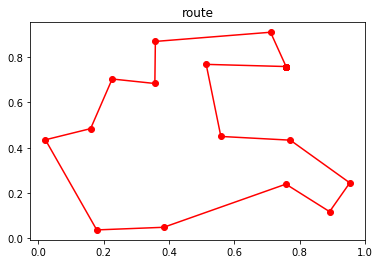

In [10]:
# 绘图
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

plt.plot(result_pos_list[:, 0], result_pos_list[:, 1], 'o-r')
plt.title(u"route")
plt.show()

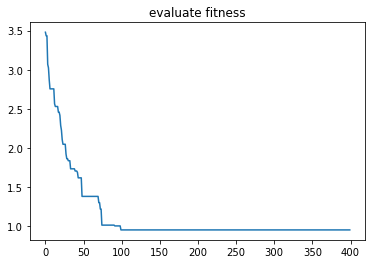

In [11]:
plt.plot(fitness_list)
plt.title(u"evaluate fitness")
plt.show()